# Importing Libs

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Reading Data

In [5]:
df=pd.read_csv('/Users/harmansingh/AI Engineering/Machine Learning/Regression/Project/Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Making Datasets

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)
print()
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# Spliting The Dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

# TRAINING DATASET WITH DIFF MODELS

# Multiple Regression

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=reg.predict(x_test)



     R Squared

     

In [24]:
from sklearn.metrics import r2_score
MR=r2_score(y_test,y_pred)
MR

0.9325315554761303

# Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures

Preg= PolynomialFeatures(degree=6)
x_poly= Preg.fit_transform(x_train)
Lreg2 = LinearRegression()
Lreg2.fit(x_poly,y_train)

LinearRegression()

In [28]:
y_poly_pred=Lreg2.predict(Preg.fit_transform(x_test))



     R Squared

     

In [33]:
from sklearn.metrics import r2_score
PR= r2_score(y_test,y_poly_pred)
PR

0.9459515005780001

# Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor(random_state=0)
reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
y_pred=reg.predict(x_test)



     R Squared

     

In [42]:
from sklearn.metrics import r2_score
DTR=r2_score(y_test,y_pred)
DTR

0.922905874177941

# Random Tree Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg =RandomForestRegressor(n_estimators=10,random_state=0)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [45]:
y_pred= reg.predict(x_test)



     R Squared

     

In [49]:
from sklearn.metrics import r2_score
RTR=r2_score(y_test,y_pred)
RTR

0.9615908334363876

# SVR Regression

In [51]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train=sc_x.fit_transform(x_train)
y_train=y_train.reshape(len(y_train),1)
y_train=sc_y.fit_transform(y_train)


In [53]:
from sklearn.svm import SVR
reg= SVR(kernel='rbf')
y_train=y_train.reshape(len(y_train),)
reg.fit(x_train,y_train)

SVR()

In [55]:
y_pred=reg.predict(sc_x.fit_transform(x_test))
y_pred=y_pred.reshape(len(y_pred),1)
y_pred_inv=sc_y.inverse_transform(y_pred)



     R Squared

     

In [58]:
from sklearn.metrics import r2_score
SVRR=r2_score(y_test,y_pred_inv)
SVRR

0.9483693304317924

# Visulaiza

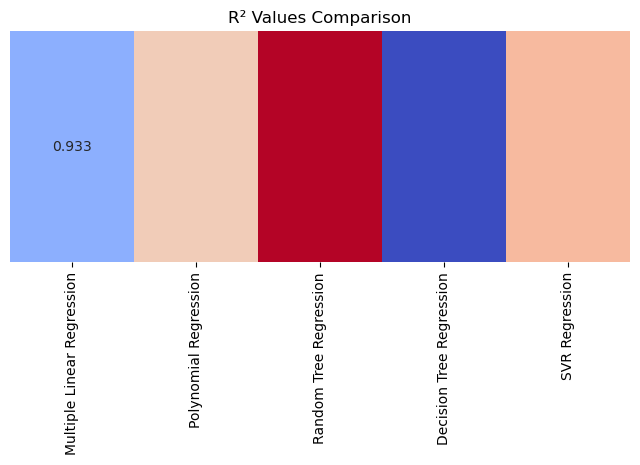

In [64]:
# Put results into DataFrame
results = pd.DataFrame({
    "Multiple Linear Regression": [MR],
    "Polynomial Regression": [PR],
    "Random Tree Regression": [RTR],
    "Decision Tree Regression": [DTR],
    "SVR Regression":[SVRR]
})

# Plot heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(results, annot=True, cmap="coolwarm", fmt=".3f", cbar=False)
plt.title("R² Values Comparison")
plt.yticks([], [])
plt.show()